In [1]:
   from google.colab import drive

   drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
df = pd.read_csv('/content/drive/MyDrive/Gurgaon_RealEstate.csv')
df.head()
df.shape

(3803, 23)

In [3]:
df.dtypes

property_type           object
society                 object
sector                  object
price                  float64
price_per_sqft         float64
area                   float64
areaWithType            object
bedRoom                  int64
bathroom                 int64
balcony                 object
floorNum               float64
facing                  object
agePossession           object
super_built_up_area    float64
built_up_area          float64
carpet_area            float64
study room               int64
servant room             int64
store room               int64
pooja room               int64
others                   int64
furnishing_type          int64
luxury_score             int64
dtype: object

In [4]:
df2=df.drop_duplicates()
df2.shape
#removing duplicate rows to decrease bias

(3677, 23)

In [5]:
df2['property_type'].unique()

array(['flat', 'house'], dtype=object)

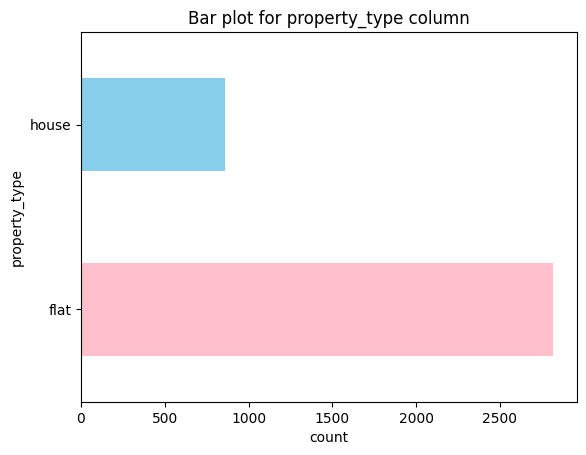

In [6]:
colors=['pink','skyblue']

df2['property_type'].value_counts().plot.barh(color=colors)

plt.title("Bar plot for property_type column")

plt.ylabel("property_type")

plt.xlabel("count")

plt.show()


In [7]:
society_counts = df2['society'].value_counts()
society_counts

society
independent                               486
tulip violet                               75
ss the leaf                                73
dlf new town heights                       42
shapoorji pallonji joyville gurugram       42
                                         ... 
dlf gardencity enclave                      1
nitin vihar                                 1
landmark the residency                      1
kw royal court                              1
surendra homes dayaindependentd colony      1
Name: count, Length: 676, dtype: int64

In [8]:
property_counts = df2.groupby(['society', 'property_type']).size().unstack().fillna(0)
property_counts


property_type,flat,house
society,,
.,1.0,0.0
4s aradhya homes,1.0,1.0
511 sarahah tower,1.0,0.0
aardhya homesh,1.0,0.0
ace palm floors,1.0,0.0
...,...,...
whiteland blissville,3.0,0.0
whiteland the aspen,1.0,0.0
wings apartment,1.0,0.0


<Axes: ylabel='Frequency'>

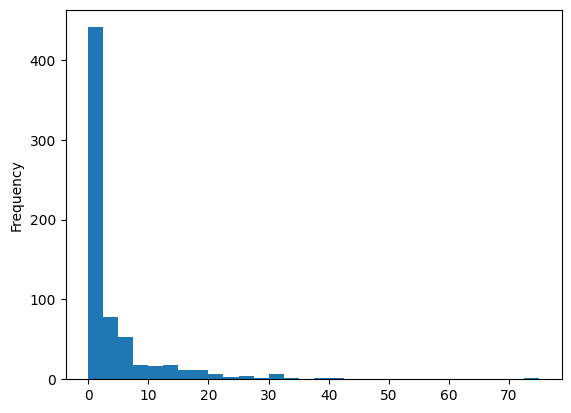

In [9]:
property_counts['flat'].plot.hist(bins=30)

In [10]:
maxrange=int(np.ceil(max(property_counts['flat'])))
minrange=int(np.floor(min(property_counts['flat'])))
range=maxrange-minrange
range
bins=10
binwidth=int(np.round(range/bins))
binwidth
maxrange

75

In [11]:
inter=[0,8,16,24,32,40,48,56,64,72,80]

In [12]:
property_counts["flat_c"]=pd.cut(property_counts['flat'],bins=inter,labels=None,include_lowest=True)

In [13]:
property_counts["flat_c"]

society
.                       (-0.001, 8.0]
4s aradhya homes        (-0.001, 8.0]
511 sarahah tower       (-0.001, 8.0]
aardhya homesh          (-0.001, 8.0]
ace palm floors         (-0.001, 8.0]
                            ...      
whiteland blissville    (-0.001, 8.0]
whiteland the aspen     (-0.001, 8.0]
wings apartment         (-0.001, 8.0]
woodstock floors        (-0.001, 8.0]
zara aavaas             (-0.001, 8.0]
Name: flat_c, Length: 676, dtype: category
Categories (10, interval[float64, right]): [(-0.001, 8.0] < (8.0, 16.0] < (16.0, 24.0] <
                                            (24.0, 32.0] ... (48.0, 56.0] < (56.0, 64.0] <
                                            (64.0, 72.0] < (72.0, 80.0]]

Text(0, 0.5, 'obs count')

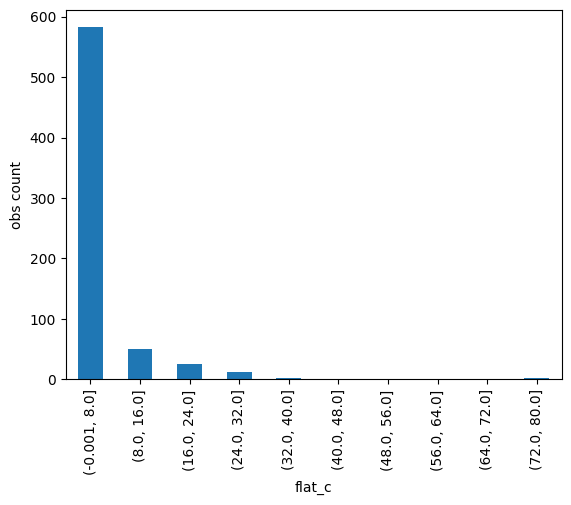

In [14]:
property_counts.groupby('flat_c')['flat'].count().plot.bar()
plt.ylabel('obs count')

In [15]:
flats_count = property_counts[property_counts['flat']>7]
flats_count

property_type,flat,house,flat_c
society,,,
adani m2k oyster grande,11.0,0.0,"(8.0, 16.0]"
aipl the peaceful homes,9.0,0.0,"(8.0, 16.0]"
alpha corp gurgaonone,11.0,0.0,"(8.0, 16.0]"
ambience creacions,18.0,0.0,"(16.0, 24.0]"
ansal heights 86,13.0,0.0,"(8.0, 16.0]"
...,...,...,...
vatika city,9.0,0.0,"(8.0, 16.0]"
vatika gurgaon,24.0,0.0,"(16.0, 24.0]"
vatika lifestyle homes,8.0,0.0,"(-0.001, 8.0]"


In [16]:
total_sum = flats_count['flat'].sum()
total_sum


1835.0

In [17]:
dfdelindh=df2.drop(df2.index[(df2["property_type"] == "house")],axis=0)
dfdelindh.shape

(2818, 23)

**PRICE**

In [18]:
dfdelindh['price'].describe()

count    2817.000000
mean        1.713280
std         1.388532
min         0.160000
25%         0.900000
50%         1.380000
75%         2.050000
max        15.000000
Name: price, dtype: float64

Text(0.5, 0, 'price')

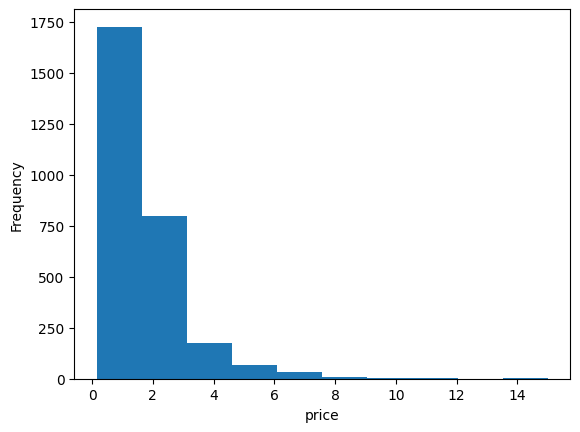

In [19]:
dfdelindh['price'].plot.hist()
plt.xlabel("price")


<Axes: >

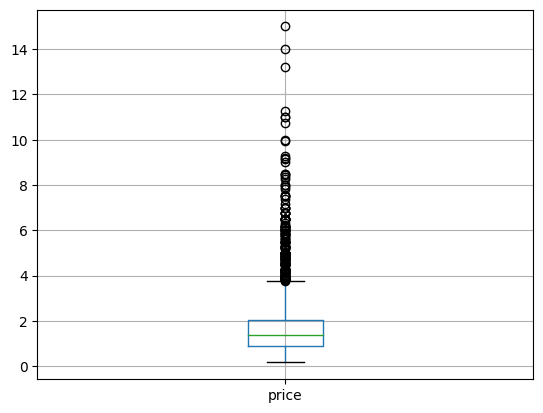

In [20]:
dfdelindh.boxplot(column=['price'])

In [21]:
dfdelindh['price'].median()

1.38

In [22]:
dfdelindh['price'].skew()

2.9087762338646748

In [23]:
dfdelindh['price'].kurtosis()

13.93041883032735

In [24]:
q1 = dfdelindh['price'].quantile(0.25)

q3 =dfdelindh['price']. quantile(0.75)
med = dfdelindh['price'].median()

iqr = q3-q1

upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound,lower_bound)

1.15 3.7749999999999995 -0.8249999999999998


In [25]:
outliers = dfdelindh['price'][(dfdelindh['price'] <= lower_bound) | (dfdelindh['price'] >= upper_bound)]
print('The following are the outliers in the boxplot:{}'.format(outliers))
poutliers=outliers.to_frame()
poutliers.max()
#outlier dataframe

The following are the outliers in the boxplot:6       7.50
56      5.60
83      9.30
130     4.55
153     5.50
        ... 
3747    4.63
3750    3.90
3758    6.50
3760    4.00
3788    6.50
Name: price, Length: 188, dtype: float64


price    15.0
dtype: float64

In [26]:
dfdelindh['price'].isnull().sum()
#null value

1

Text(0.5, 0, 'price')

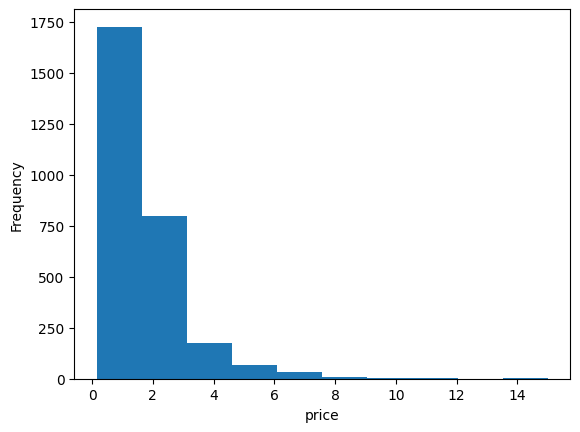

In [27]:
dfdelindh['price'].plot.hist()
plt.xlabel("price")

In [28]:
k=pd.qcut(dfdelindh['price'], q=4)
k


0       (0.159, 0.9]
1        (0.9, 1.38]
2       (0.159, 0.9]
3       (0.159, 0.9]
4       (1.38, 2.05]
            ...     
3795    (0.159, 0.9]
3796     (0.9, 1.38]
3798    (0.159, 0.9]
3800    (0.159, 0.9]
3802    (1.38, 2.05]
Name: price, Length: 2818, dtype: category
Categories (4, interval[float64, right]): [(0.159, 0.9] < (0.9, 1.38] < (1.38, 2.05] < (2.05, 15.0]]

<Axes: xlabel='price'>

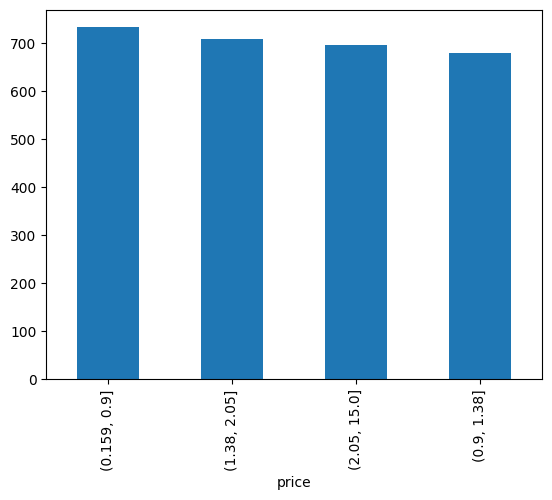

In [29]:
counts = k.value_counts()

counts.plot(kind='bar')

**SECTOR**

In [30]:
dfdelindh['sector'].describe()

count           2818
unique            98
top       sohna road
freq             153
Name: sector, dtype: object

In [31]:
dfdelindh['sector'].value_counts().head(10)

sector
sohna road    153
sector 85     108
sector 102    107
sector 92      96
sector 69      91
sector 90      89
sector 65      86
sector 81      84
sector 79      76
sector 83      67
Name: count, dtype: int64

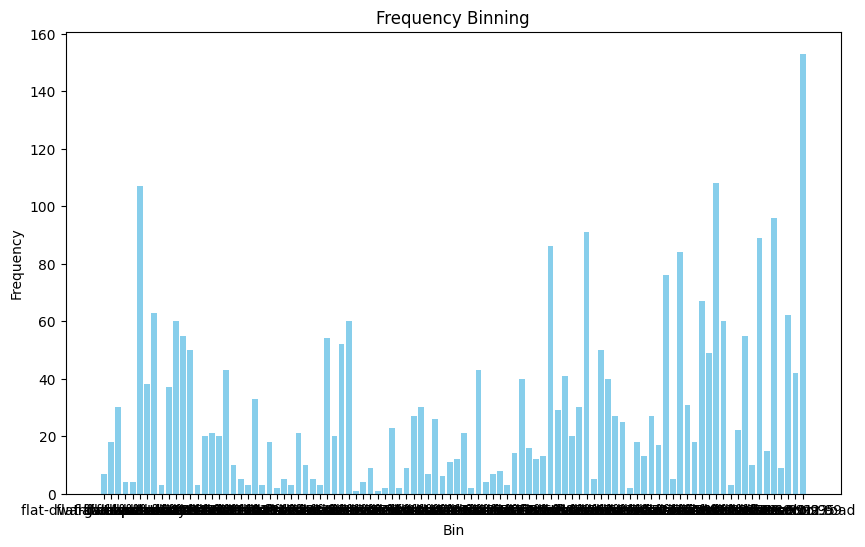

In [32]:
frequency_table = dfdelindh.groupby(['property_type', 'sector']).size().reset_index(name='Frequency')
# Plot
plt.figure(figsize=(10, 6))
plt.bar(frequency_table.index, frequency_table['Frequency'], color='skyblue')
plt.xlabel('Bin')
plt.ylabel('Frequency')
plt.title('Frequency Binning')
plt.xticks(ticks=frequency_table.index, labels=frequency_table.apply(lambda x: f'{x["property_type"]}-{x["sector"]}', axis=1))
plt.show()

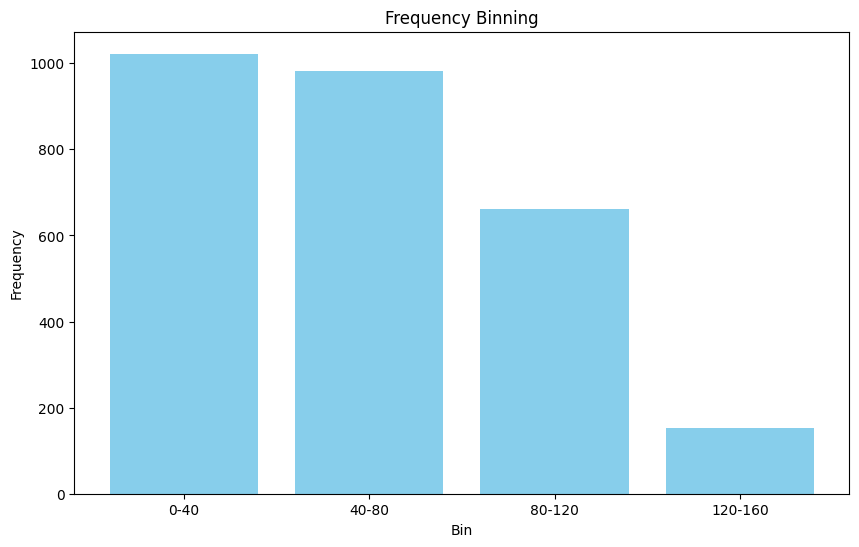

In [33]:
frequency_table = dfdelindh.groupby(['property_type', 'sector']).size().reset_index(name='Frequency')

def bin_frequencies(freq):
    if freq <= 40:
        return '0-40'
    elif freq <= 80:
        return '40-80'
    elif freq <= 120:
        return '80-120'
    else:
        return '120-160'

frequency_table['Bin'] = frequency_table['Frequency'].apply(bin_frequencies)

bin_order = ['0-40', '40-80', '80-120', '120-160']
frequency_table['Bin'] = pd.Categorical(frequency_table['Bin'], categories=bin_order, ordered=True)

binned_frequency = frequency_table.groupby('Bin')['Frequency'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(binned_frequency['Bin'], binned_frequency['Frequency'], color='skyblue')
plt.xlabel('Bin')
plt.ylabel('Frequency')
plt.title('Frequency Binning')
plt.show()

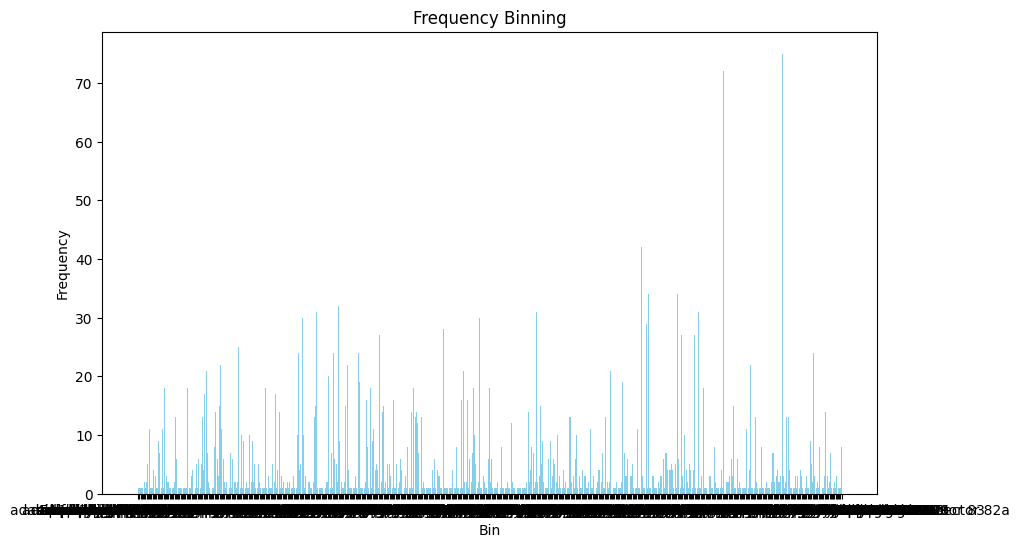

In [34]:
frequency_table = dfdelindh.groupby(['society', 'sector']).size().reset_index(name='Frequency')
# Plot
plt.figure(figsize=(10, 6))
plt.bar(frequency_table.index, frequency_table['Frequency'], color='skyblue')
plt.xlabel('Bin')
plt.ylabel('Frequency')
plt.title('Frequency Binning')
plt.xticks(ticks=frequency_table.index, labels=frequency_table.apply(lambda x: f'{x["society"]}-{x["sector"]}', axis=1))
plt.show()

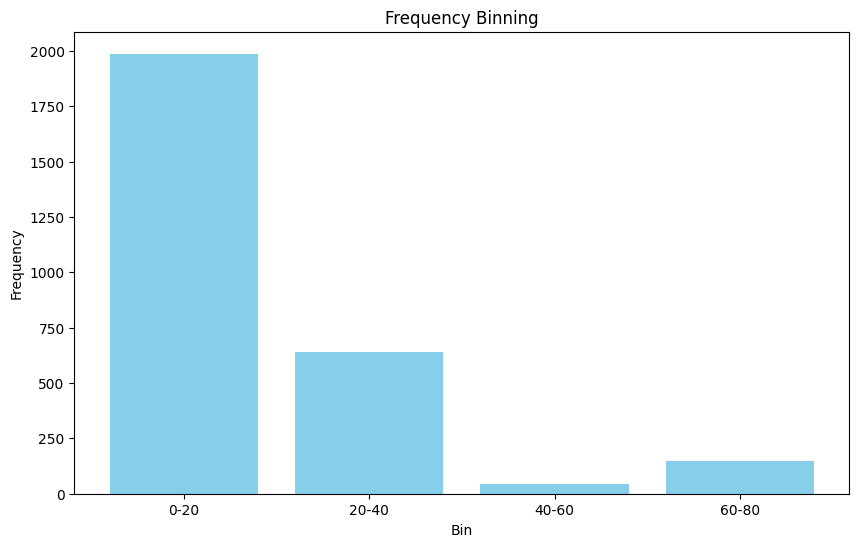

In [35]:
frequency_table = dfdelindh.groupby(['society', 'sector']).size().reset_index(name='Frequency')

def bin_frequencies(freq):
    if freq <= 20:
        return '0-20'
    elif freq <= 40:
        return '20-40'
    elif freq <= 60:
        return '40-60'
    else:
        return '60-80'

frequency_table['Bin'] = frequency_table['Frequency'].apply(bin_frequencies)

bin_order = ['0-20', '20-40', '40-60', '60-80']
frequency_table['Bin'] = pd.Categorical(frequency_table['Bin'], categories=bin_order, ordered=True)

binned_frequency = frequency_table.groupby('Bin')['Frequency'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(binned_frequency['Bin'], binned_frequency['Frequency'], color='skyblue')
plt.xlabel('Bin')
plt.ylabel('Frequency')
plt.title('Frequency Binning')
plt.show()

**PRICE FOR SQ FT**

In [36]:
dfdelindh['price_per_sqft'].describe()

count      2817.000000
mean       9342.052183
std        5613.313741
min           4.000000
25%        6506.000000
50%        8347.000000
75%       11050.000000
max      200000.000000
Name: price_per_sqft, dtype: float64

Text(0.5, 0, 'price_per_sqft')

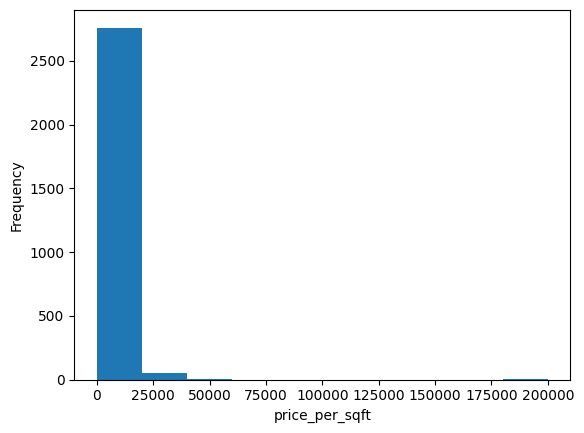

In [37]:
dfdelindh['price_per_sqft'].plot.hist()
plt.xlabel("price_per_sqft")

<Axes: >

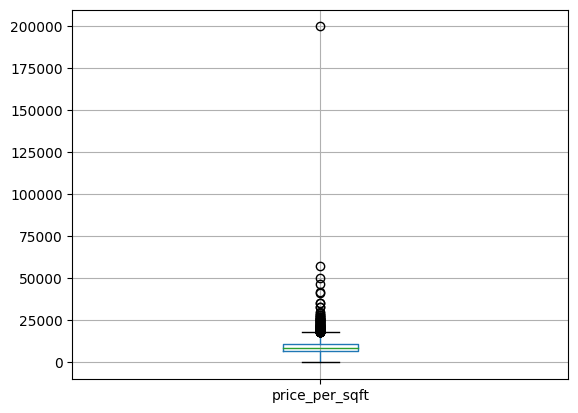

In [38]:
dfdelindh.boxplot(column=['price_per_sqft'])

In [39]:
dfdelindh['price_per_sqft'].median()

8347.0

In [40]:
dfdelindh['price_per_sqft'].skew()

15.046209991848315

In [41]:
dfdelindh['price_per_sqft'].kurtosis()

476.8543922324539

In [42]:
q1 = dfdelindh['price_per_sqft'].quantile(0.25)


q3 =dfdelindh['price_per_sqft']. quantile(0.75)
med = dfdelindh['price_per_sqft'].median()

iqr = q3-q1

upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound,lower_bound)

4544.0 17866.0 -310.0


In [43]:
outliers = dfdelindh['price_per_sqft'][(dfdelindh['price_per_sqft'] <= lower_bound) | (dfdelindh['price_per_sqft'] >= upper_bound)]
print('The following are the outliers in the boxplot:{}'.format(outliers))

The following are the outliers in the boxplot:56      19363.0
83      24926.0
179     19200.0
198     21538.0
261     18492.0
         ...   
3696    20995.0
3715    22346.0
3750    33209.0
3758    20687.0
3788    21922.0
Name: price_per_sqft, Length: 100, dtype: float64


In [44]:
dfdelindh['price_per_sqft'].isnull().sum()
#null value

1

**AREA**

In [45]:
dfdelindh['area'].describe()

count      2817.000000
mean       2857.935747
std       25930.790790
min          72.000000
25%        1259.000000
50%        1671.000000
75%        2132.000000
max      875000.000000
Name: area, dtype: float64

Text(0.5, 0, 'area')

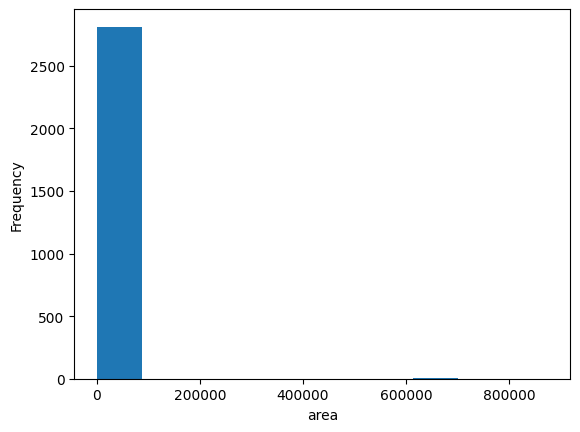

In [46]:
dfdelindh['area'].plot.hist()
plt.xlabel("area")


<Axes: >

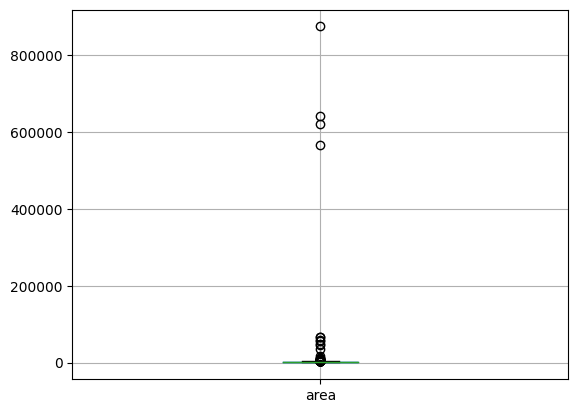

In [47]:
dfdelindh.boxplot(column=['area'])

In [48]:
dfdelindh['area'].median()

1671.0

In [49]:
dfdelindh['area'].skew()

27.3270690210445

In [50]:
dfdelindh['area'].kurtosis()

778.1884813282747

In [51]:
q1 = dfdelindh['area'].quantile(0.25)

q3 =dfdelindh['area']. quantile(0.75)
med = dfdelindh['area'].median()

iqr = q3-q1

upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound,lower_bound)

873.0 3441.5 -50.5


In [52]:
outliers = dfdelindh['area'][(dfdelindh['area'] <= lower_bound) | (dfdelindh['area'] >= upper_bound)]
print('The following are the outliers in the boxplot:{}'.format(outliers))

The following are the outliers in the boxplot:2       58228.0
6        5350.0
83       3731.0
115     49123.0
130      4550.0
         ...   
3516     4848.0
3538     6700.0
3553     3500.0
3649    45283.0
3696     4739.0
Name: area, Length: 104, dtype: float64


In [53]:
dfdelindh['area'].isnull().sum()
#null value

1

**BEDROOM**

In [54]:
dfdelindh['bedRoom'].describe()

count    2818.000000
mean        2.805891
std         0.782943
min         1.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         6.000000
Name: bedRoom, dtype: float64

Text(0.5, 0, 'bedRoom')

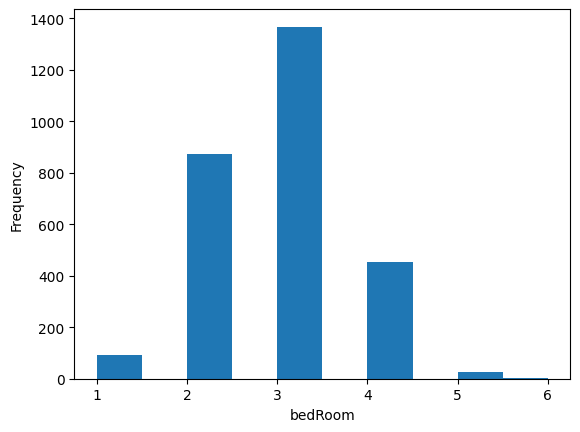

In [55]:
dfdelindh['bedRoom'].plot.hist()
plt.xlabel("bedRoom")

<Axes: >

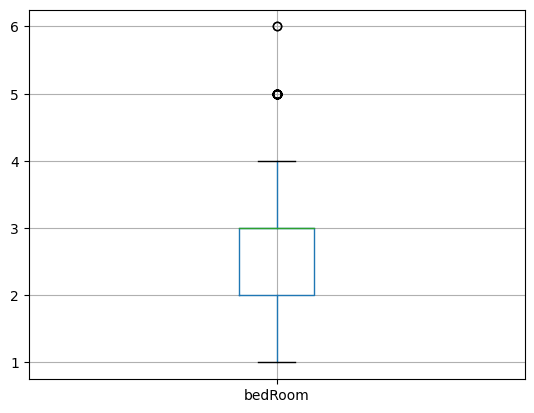

In [56]:
dfdelindh.boxplot(column=['bedRoom'])

In [57]:
dfdelindh['bedRoom'].median()

3.0

In [58]:
dfdelindh['bedRoom'].skew()

0.09710030131613122

In [59]:
dfdelindh['bedRoom'].kurtosis()

-0.022508031606669032

In [60]:
q1 = dfdelindh['bedRoom'].quantile(0.25)


q3 =dfdelindh['bedRoom']. quantile(0.75)
med = dfdelindh['bedRoom'].median()

iqr = q3-q1

upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound,lower_bound)

1.0 4.5 0.5


In [61]:
outliers = dfdelindh['bedRoom'][(dfdelindh['bedRoom'] <= lower_bound) | (dfdelindh['bedRoom'] >= upper_bound)]
print('The following are the outliers in the boxplot:{}'.format(outliers))

The following are the outliers in the boxplot:195     5
358     5
450     5
463     5
695     6
816     5
1031    5
1209    5
1230    5
1282    5
1340    5
1426    5
1548    5
1771    5
1816    5
1967    5
2023    5
2302    5
2303    5
2602    5
2905    5
3044    5
3050    5
3098    5
3242    5
3261    5
3265    5
3388    6
3538    5
3552    5
Name: bedRoom, dtype: int64


In [62]:
dfdelindh['bedRoom'].isnull().sum()

0

**BATH ROOM**

In [63]:
dfdelindh['bathroom'].describe()

count    2818.00000
mean        2.96274
std         1.03833
min         1.00000
25%         2.00000
50%         3.00000
75%         4.00000
max         7.00000
Name: bathroom, dtype: float64

Text(0.5, 0, 'bathroom')

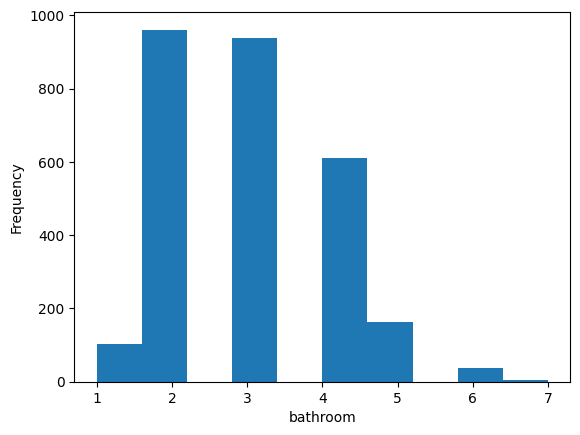

In [64]:
dfdelindh['bathroom'].plot.hist()
plt.xlabel("bathroom")

<Axes: >

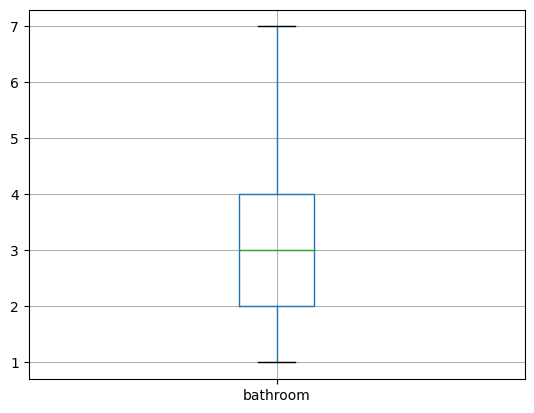

In [65]:
dfdelindh.boxplot(column=['bathroom'])

In [66]:
dfdelindh['bathroom'].skew()

0.5504578297369159

In [67]:
dfdelindh['bathroom'].kurtosis()

0.10698715602805953

In [68]:
q1 = dfdelindh['bathroom'].quantile(0.25)


q3 =dfdelindh['bathroom']. quantile(0.75)
med = dfdelindh['bathroom'].median()

iqr = q3-q1

upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound,lower_bound)

2.0 7.0 -1.0


In [69]:
outliers = dfdelindh['bathroom'][(dfdelindh['bathroom'] <= lower_bound) | (dfdelindh['bathroom'] >= upper_bound)]
print('The following are the outliers in the boxplot:{}'.format(outliers))

The following are the outliers in the boxplot:195     7
358     7
695     7
1282    7
Name: bathroom, dtype: int64


In [70]:
dfdelindh['bathroom'].isnull().sum()

0

**FLOOR NUMBER**

In [71]:
dfdelindh['floorNum'].describe()

count    2816.000000
mean        7.997869
std         6.197977
min         0.000000
25%         3.000000
50%         7.000000
75%        11.000000
max        45.000000
Name: floorNum, dtype: float64

Text(0.5, 0, 'floorNum')

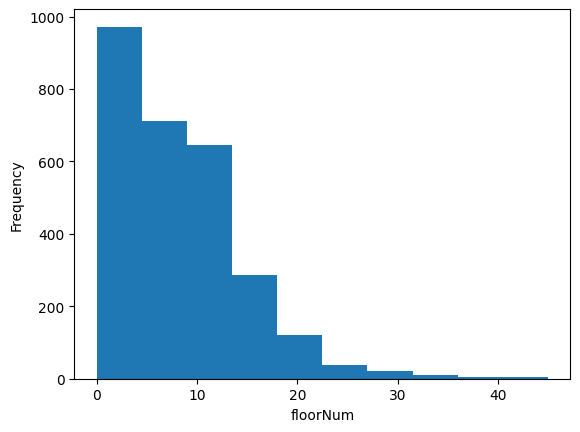

In [72]:
dfdelindh['floorNum'].plot.hist()
plt.xlabel("floorNum")

<Axes: >

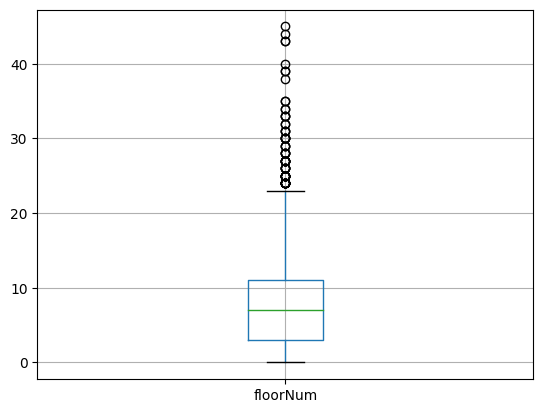

In [73]:
dfdelindh.boxplot(column=['floorNum'])

In [74]:
dfdelindh['floorNum'].median()

7.0

In [75]:
dfdelindh['floorNum'].skew()

1.3559219170558898

In [76]:
dfdelindh['floorNum'].kurtosis()

3.1834433931327313

In [77]:
q1 = dfdelindh['floorNum'].quantile(0.25)

q3 =dfdelindh['floorNum']. quantile(0.75)
med = dfdelindh['floorNum'].median()

iqr = q3-q1

upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound,lower_bound)

8.0 23.0 -9.0


In [78]:
outliers = dfdelindh['floorNum'][(dfdelindh['floorNum'] <= lower_bound) | (dfdelindh['floorNum'] >= upper_bound)]
print('The following are the outliers in the boxplot:{}'.format(outliers))

The following are the outliers in the boxplot:30      31.0
33      45.0
169     29.0
224     23.0
277     27.0
        ... 
3607    26.0
3637    24.0
3750    33.0
3775    24.0
3802    27.0
Name: floorNum, Length: 78, dtype: float64


In [79]:
dfdelindh['floorNum'].isnull().sum()

2

**STUDY ROOM**

In [80]:
dfdelindh['study room'].describe()

count    2818.000000
mean        0.163591
std         0.369970
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: study room, dtype: float64

Text(0.5, 0, 'study room')

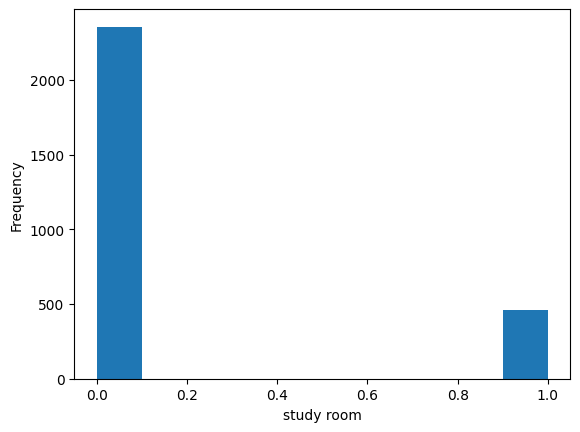

In [81]:
dfdelindh['study room'].plot.hist()
plt.xlabel("study room")

In [82]:
dfdelindh['study room'].median()

0.0

In [83]:
dfdelindh['study room'].skew()

1.8198657283552102

In [84]:
dfdelindh['study room'].kurtosis()

1.3128425203957281

In [85]:
dfdelindh['study room'].isnull().sum()

0

**SERVANT ROOM**

In [86]:
dfdelindh['servant room'].describe()

count    2818.000000
mean        0.343151
std         0.474846
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: servant room, dtype: float64

Text(0.5, 0, 'servant rooms')

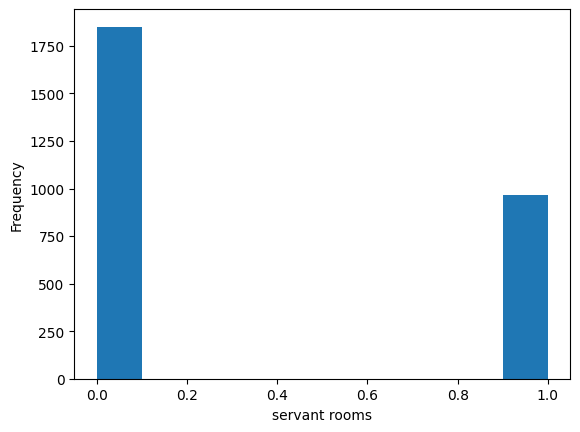

In [87]:
dfdelindh['servant room'].plot.hist()
plt.xlabel("servant rooms")

In [88]:
dfdelindh['servant room'].isnull().sum()

0

In [89]:
q1 = dfdelindh['servant room'].quantile(0.25)


q3 =dfdelindh['servant room']. quantile(0.75)
med = dfdelindh['servant room'].median()

iqr = q3-q1

upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound,lower_bound)

1.0 2.5 -1.5


<Axes: >

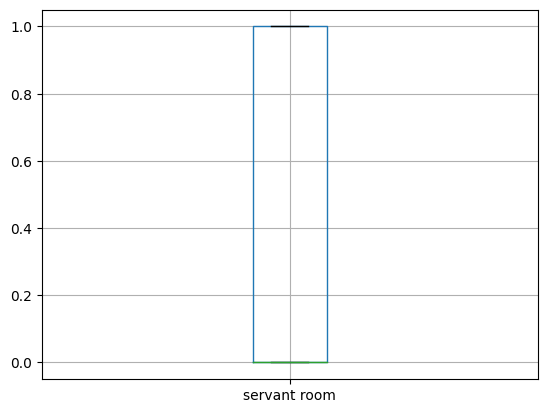

In [90]:
dfdelindh.boxplot(column=['servant room'])

In [91]:
outliers = dfdelindh['servant room'][(dfdelindh['servant room'] <= lower_bound) | (dfdelindh['servant room'] >= upper_bound)]
print('The following are the outliers in the boxplot:{}'.format(outliers))

The following are the outliers in the boxplot:Series([], Name: servant room, dtype: int64)


**STORE ROOM**

In [92]:
dfdelindh['store room'].describe()

count    2818.000000
mean        0.053229
std         0.224530
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: store room, dtype: float64

Text(0.5, 0, 'store room')

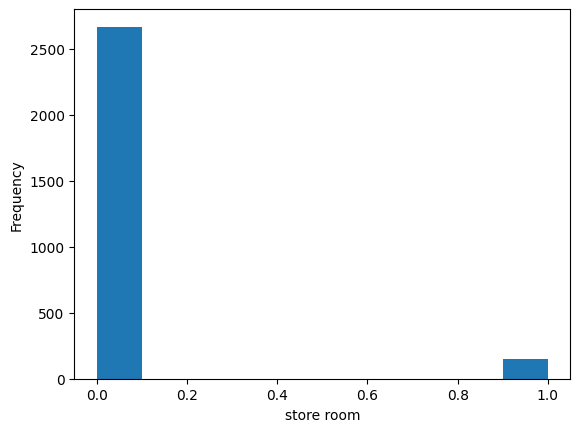

In [93]:
dfdelindh['store room'].plot.hist()
plt.xlabel("store room")

In [94]:
dfdelindh['store room'].isnull().sum()

0

**POOJA ROOM**

In [95]:
dfdelindh['pooja room'].describe()

count    2818.000000
mean        0.124911
std         0.330677
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: pooja room, dtype: float64

Text(0.5, 0, 'pooja room')

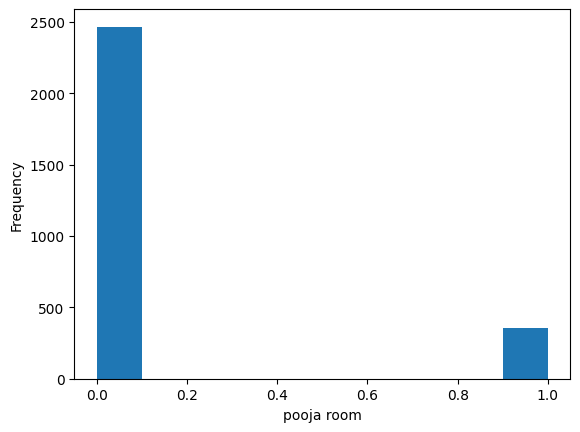

In [96]:
dfdelindh['pooja room'].plot.hist()
plt.xlabel("pooja room")

In [97]:
dfdelindh['pooja room'].isnull().sum()

0

**OTHERS**

In [98]:
dfdelindh['others'].describe()

count    2818.000000
mean        0.104684
std         0.306200
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: others, dtype: float64

Text(0.5, 0, 'others')

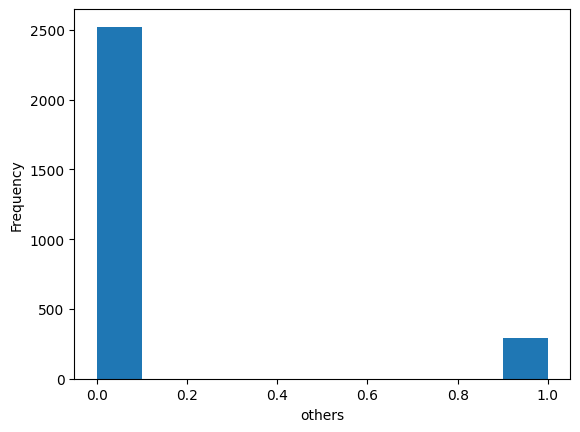

In [99]:
dfdelindh['others'].plot.hist()
plt.xlabel("others")

In [100]:
dfdelindh['others'].isnull().sum()

0

**FURNISHING**

In [101]:
dfdelindh['furnishing_type'].describe()

count    2818.000000
mean        0.374024
std         0.580654
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: furnishing_type, dtype: float64

Text(0.5, 0, 'furnishing_type')

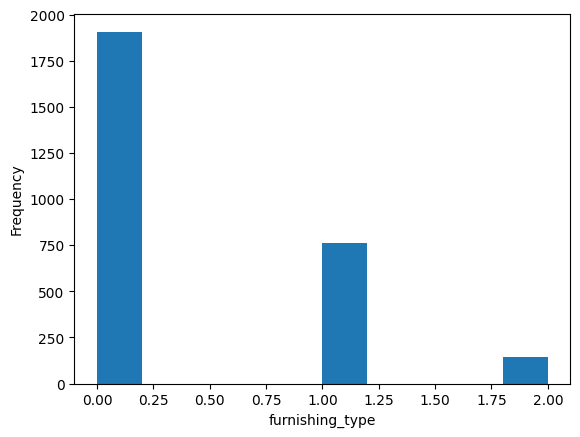

In [102]:
dfdelindh['furnishing_type'].plot.hist()
plt.xlabel("furnishing_type")

**LUXURY SCORE**

MULTI VARIATE ANALYSIS

In [103]:
import seaborn as sns

<Axes: xlabel='furnishing_type', ylabel='price'>

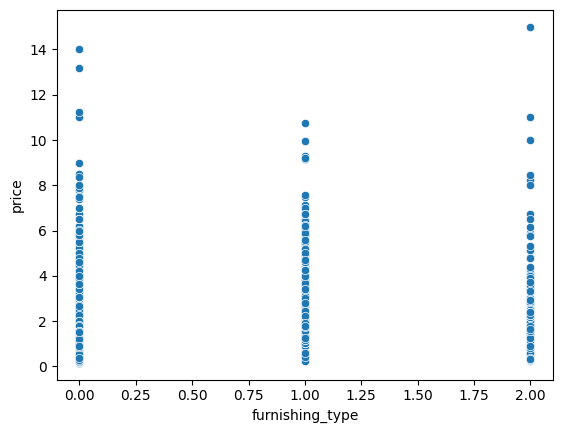

In [104]:
df_scatter = dfdelindh[['furnishing_type', 'price']]
sns.scatterplot(data=df_scatter, x='furnishing_type', y='price')

<Axes: xlabel='bedRoom', ylabel='price'>

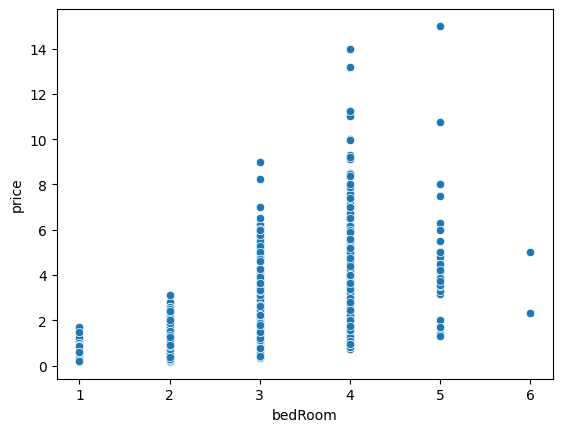

In [105]:
df_scatter = dfdelindh[['bedRoom', 'price']]
sns.scatterplot(data=df_scatter, x='bedRoom', y='price')

<Axes: xlabel='agePossession', ylabel='price'>

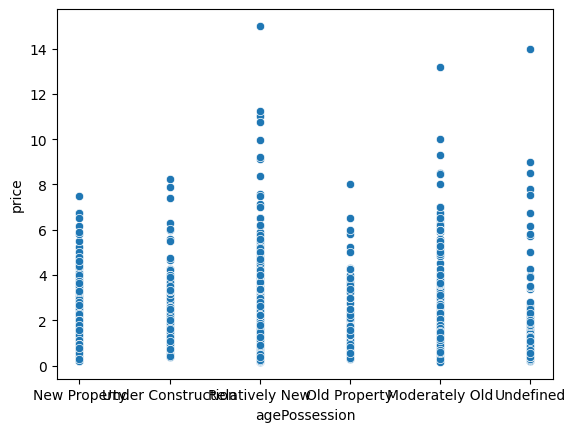

In [106]:
df_scatter = dfdelindh[['agePossession', 'price']]
sns.scatterplot(data=df_scatter, x='agePossession', y='price')

<Axes: xlabel='furnishing_type', ylabel='price'>

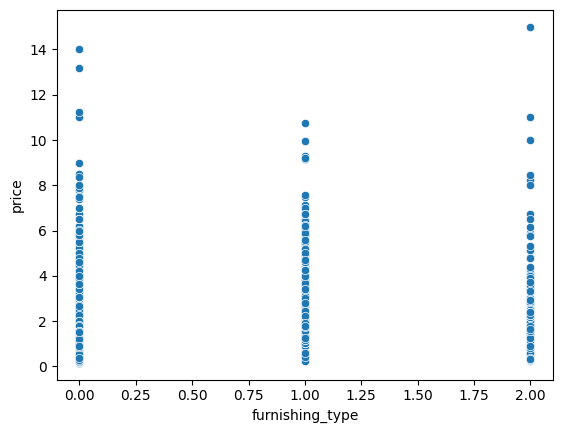

In [107]:
df_scatter = dfdelindh[['furnishing_type', 'price']]
sns.scatterplot(data=df_scatter, x='furnishing_type', y='price')

<Axes: xlabel='price_per_sqft', ylabel='price'>

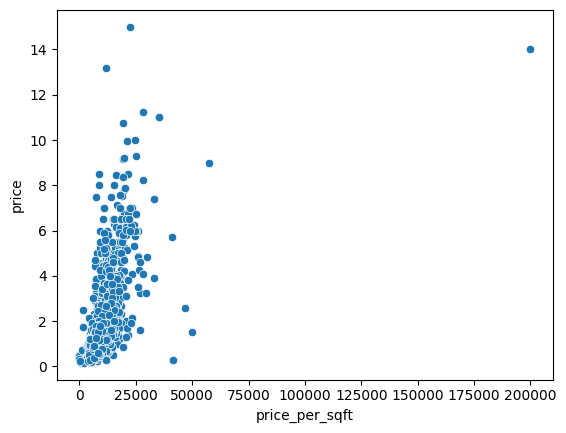

In [108]:
df_scatter = dfdelindh[['price_per_sqft', 'price']]
sns.scatterplot(data=df_scatter, x='price_per_sqft', y='price')

<Axes: xlabel='society', ylabel='price'>

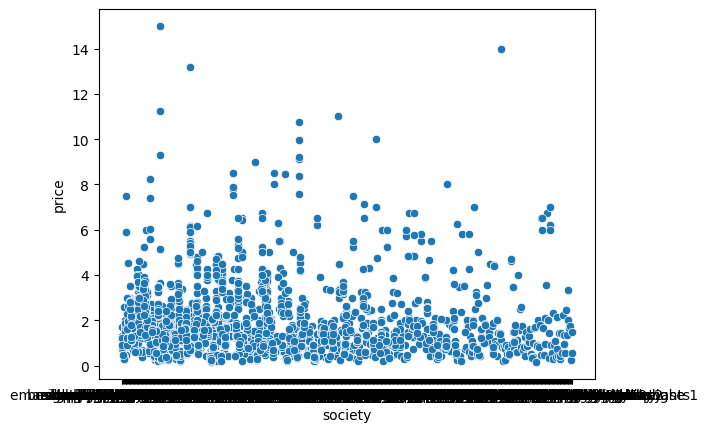

In [109]:
df_scatter = dfdelindh[['society', 'price']]
sns.scatterplot(data=df_scatter, x='society', y='price')

<Axes: xlabel='bathroom', ylabel='price'>

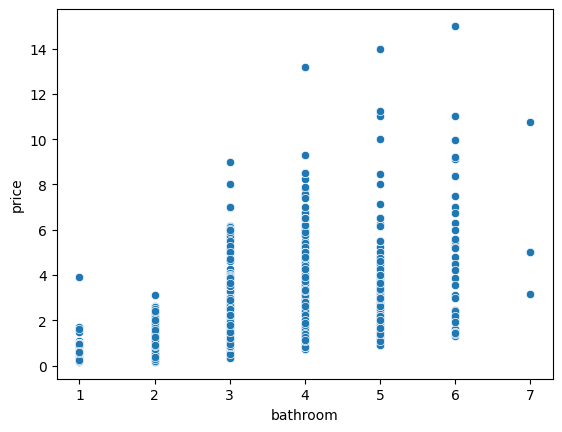

In [110]:
df_scatter = dfdelindh[['bathroom', 'price']]
sns.scatterplot(data=df_scatter, x='bathroom', y='price')

<Axes: xlabel='balcony', ylabel='price'>

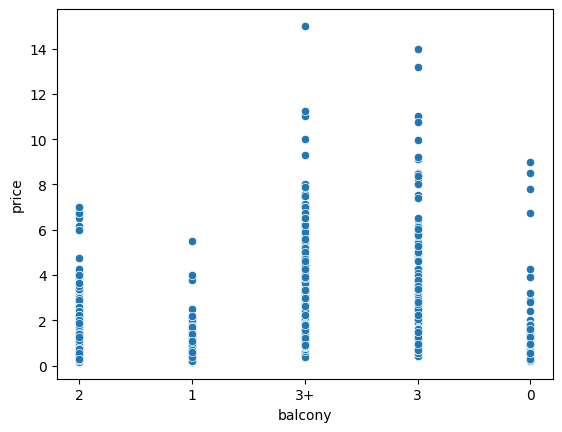

In [111]:
df_scatter = dfdelindh[['balcony', 'price']]
sns.scatterplot(data=df_scatter, x='balcony', y='price')


<Axes: xlabel='property_type', ylabel='bathroom'>

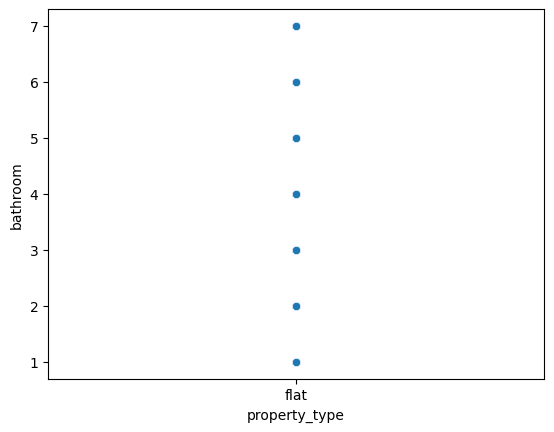

In [112]:

df_scatter = dfdelindh[['property_type','bathroom']]
sns.scatterplot(data=df_scatter, y='bathroom', x='property_type')

<Axes: xlabel='luxury_score', ylabel='price'>

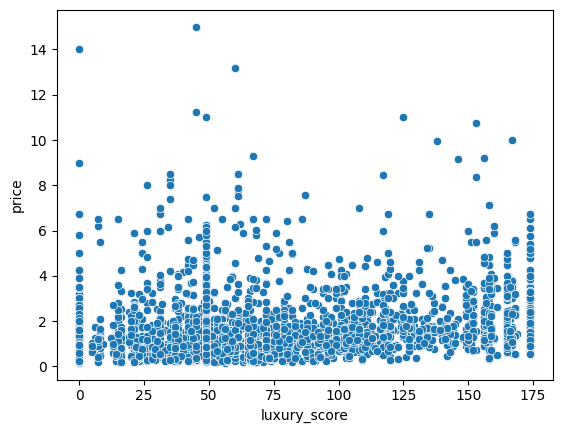

In [113]:
df_scatter = dfdelindh[['luxury_score', 'price']]
sns.scatterplot(data=df_scatter, x='luxury_score', y='price')

**MISSING VALUES ACROSS DATASET**

In [114]:
dfdelindh.isnull().sum()

property_type             0
society                   1
sector                    0
price                     1
price_per_sqft            1
area                      1
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                  2
facing                  787
agePossession             0
super_built_up_area     943
built_up_area          1935
carpet_area            1107
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

count    2818.000000
mean        2.751242
std         1.076192
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: balcony, dtype: float64

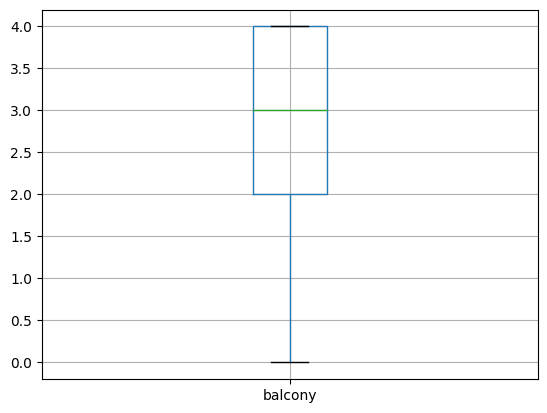

In [115]:
dfdelindh['balcony'] = dfdelindh['balcony'].replace('3+', 4)
dfdelindh['balcony']= pd.to_numeric(dfdelindh['balcony'])
dfdelindh.boxplot(column='balcony')
dfdelindh['balcony'].describe()

**STEP2**

In [116]:
data_filled = dfdelindh.fillna(99999)
data_filled.info()
# For each categorical column, calculating the distribution of categories
category_cols = data_filled.select_dtypes(include=['object']).columns
category_ratios = {}
for col in category_cols:
    category_ratios[col] = data_filled[col].value_counts(normalize=True)

category_ratios[col].values
# Imputing missing categorical values
for col in category_cols:
    missing_indices = dfdelindh[col].isnull()
    num_missing = missing_indices.sum()
    if num_missing > 0:
        imputed_values = np.random.choice(category_ratios[col].index, size=num_missing, p=category_ratios[col].values)
        dfdelindh.loc[missing_indices, col] = imputed_values

# For numerical columns
numerical_cols = dfdelindh.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    missing_indices = dfdelindh[col].isnull()
    num_missing = missing_indices.sum()
    if num_missing > 0:
        non_missing_values =  dfdelindh[col][~missing_indices]
        imputed_values = np.random.choice(non_missing_values, size=num_missing)
        dfdelindh.loc[missing_indices, col] = imputed_values

dfdelindh.isnull().sum()


original_ratios = {}
imputed_ratios = {}

# Calculating original ratios
for col in category_cols:
    original_ratios[col] = dfdelindh[col].value_counts(normalize=True)

#calculating original ratio for numerical cols

for col in numerical_cols:
  original_ratios[col] = dfdelindh[col].value_counts(normalize=True)

# Calculating imputed ratios
for col in category_cols:
    imputed_ratios[col] = dfdelindh[col].value_counts(normalize=True)
#calculating  imputed ratio for numeric
for col in numerical_cols:
    imputed_ratios[col] = dfdelindh[col].value_counts(normalize=True)

# Comparing original and imputed ratios
for col in category_cols:
    print(f"Column: {col}")
    print("Original ratios:")
    print(original_ratios[col])
    print("Imputed ratios:")
    print(imputed_ratios[col])


for col in numerical_cols:
    print(f"Column: {col}")
    print("Original ratios:")
    print(original_ratios[col])
    print("Imputed ratios:")
    print(imputed_ratios[col])


<class 'pandas.core.frame.DataFrame'>
Index: 2818 entries, 0 to 3802
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        2818 non-null   object 
 1   society              2818 non-null   object 
 2   sector               2818 non-null   object 
 3   price                2818 non-null   float64
 4   price_per_sqft       2818 non-null   float64
 5   area                 2818 non-null   float64
 6   areaWithType         2818 non-null   object 
 7   bedRoom              2818 non-null   int64  
 8   bathroom             2818 non-null   int64  
 9   balcony              2818 non-null   int64  
 10  floorNum             2818 non-null   float64
 11  facing               2818 non-null   object 
 12  agePossession        2818 non-null   object 
 13  super_built_up_area  2818 non-null   float64
 14  built_up_area        2818 non-null   float64
 15  carpet_area          2818 non-null   float6

In [117]:
dfdelindh.isnull().sum()

property_type          0
society                0
sector                 0
price                  0
price_per_sqft         0
area                   0
areaWithType           0
bedRoom                0
bathroom               0
balcony                0
floorNum               0
facing                 0
agePossession          0
super_built_up_area    0
built_up_area          0
carpet_area            0
study room             0
servant room           0
store room             0
pooja room             0
others                 0
furnishing_type        0
luxury_score           0
dtype: int64

**STEP 3**

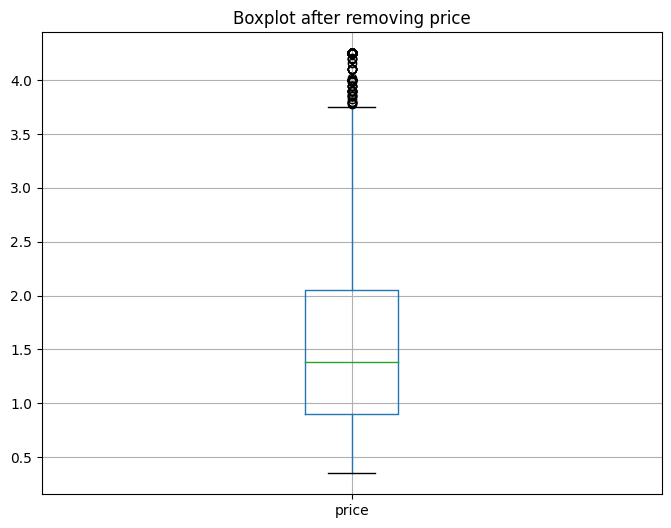

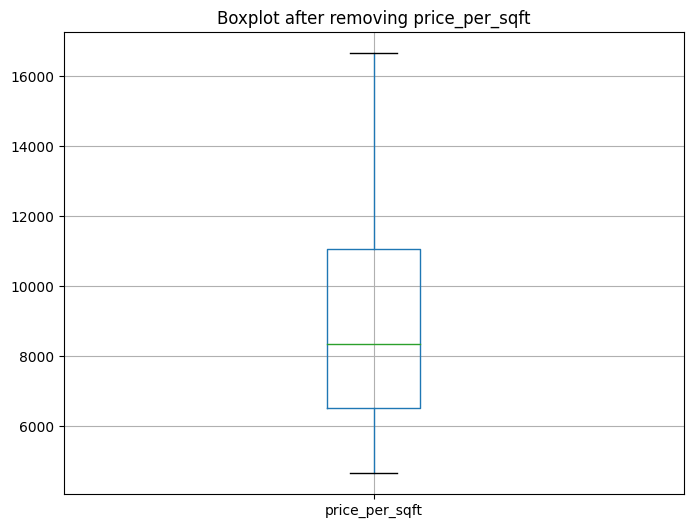

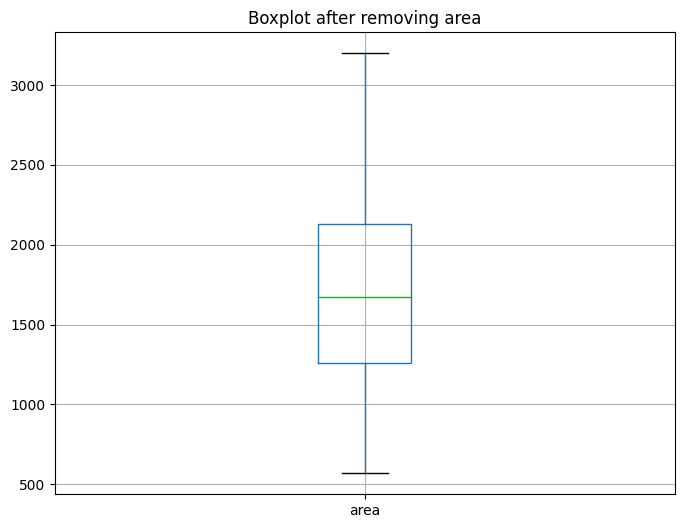

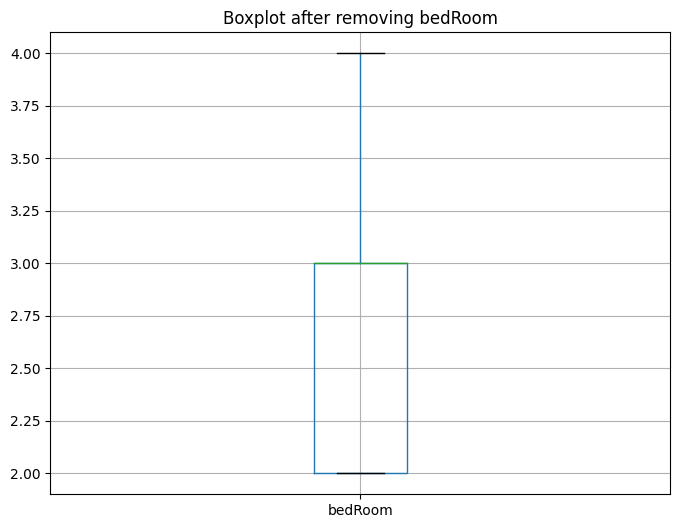

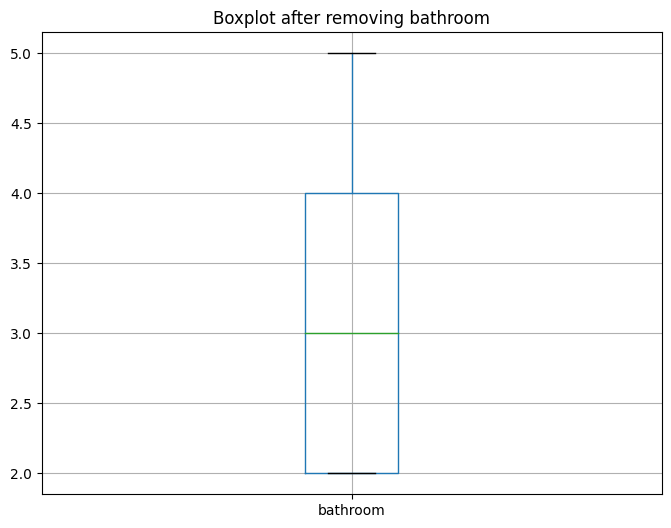

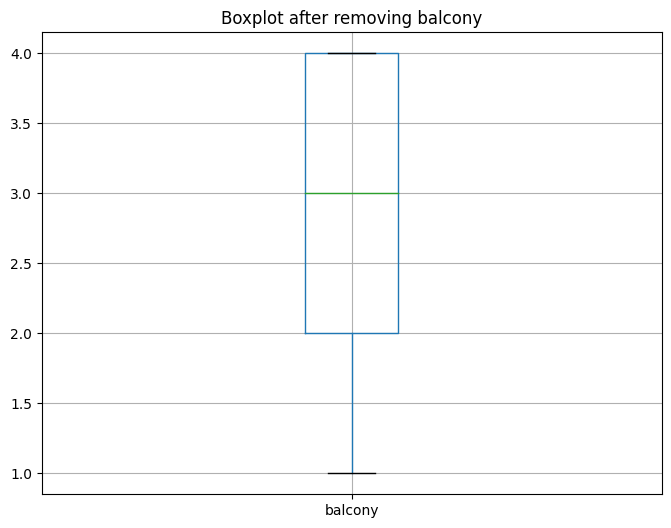

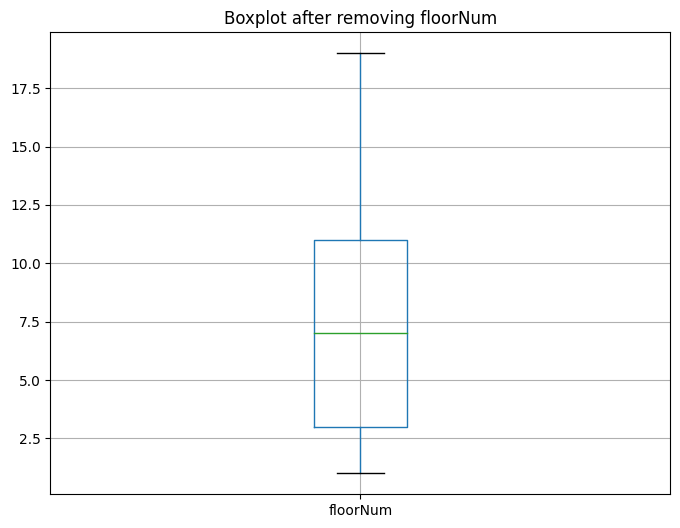

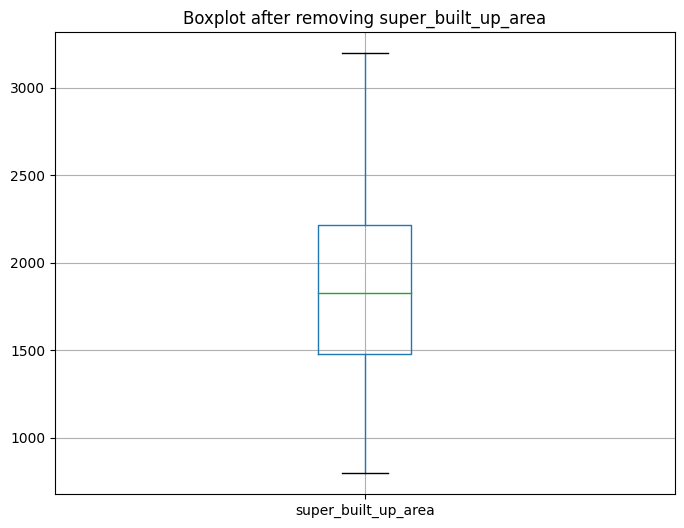

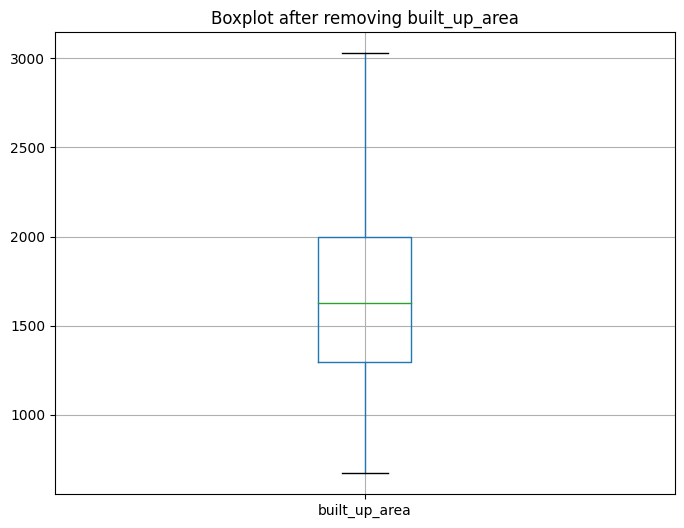

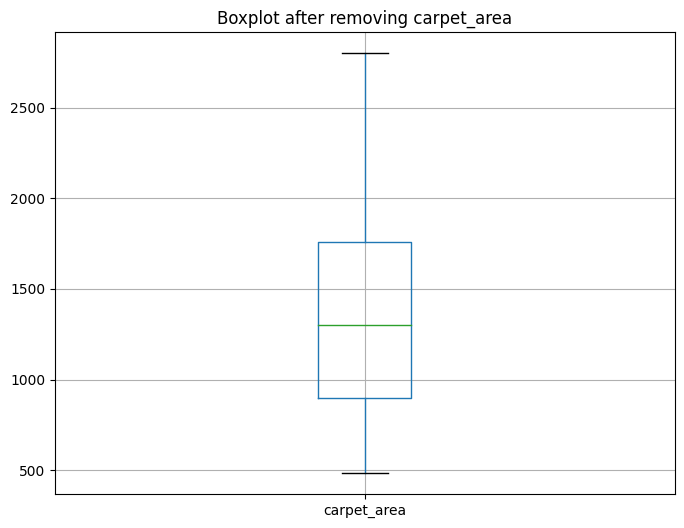

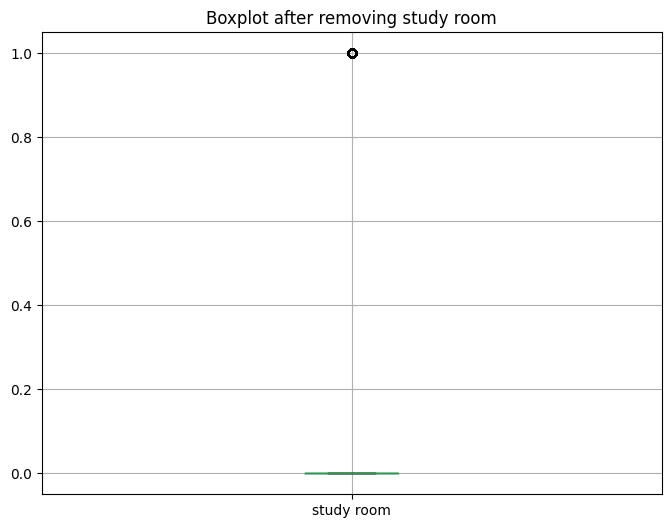

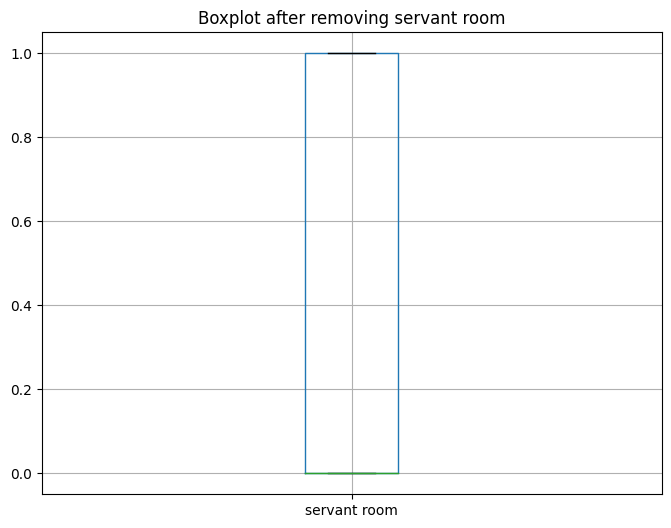

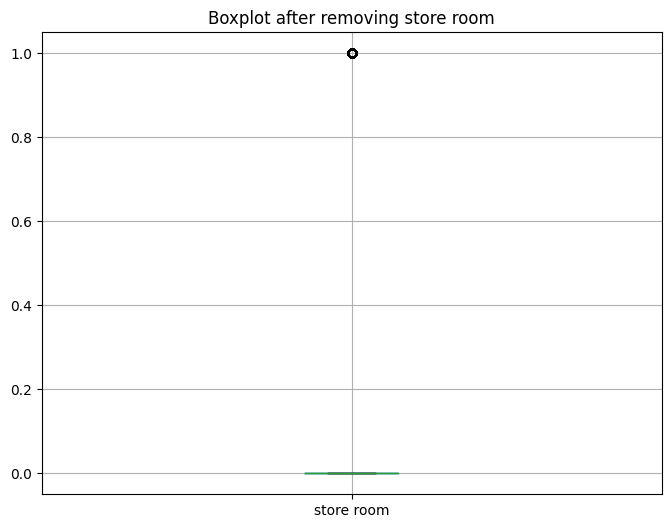

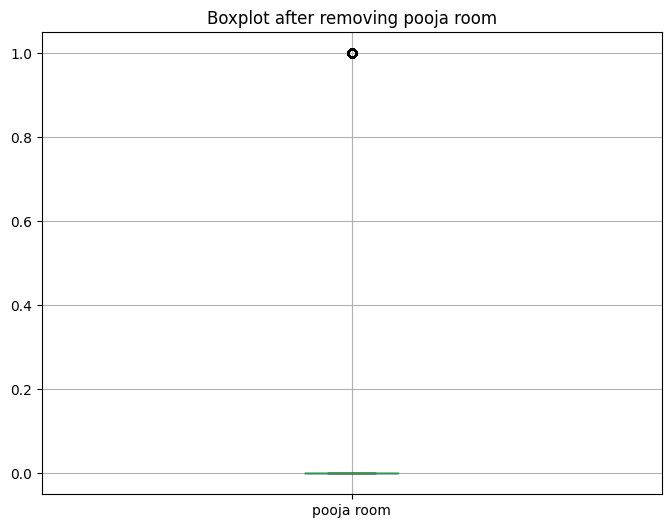

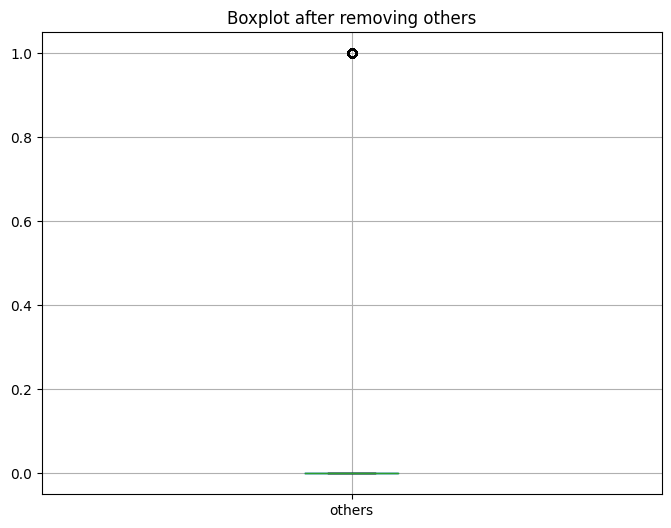

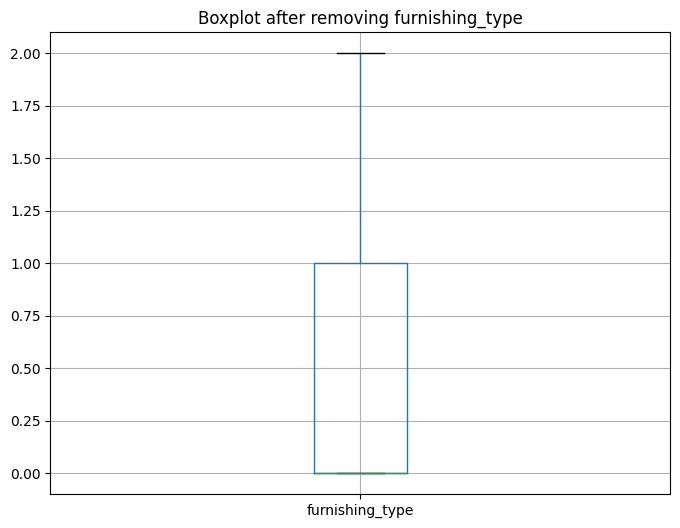

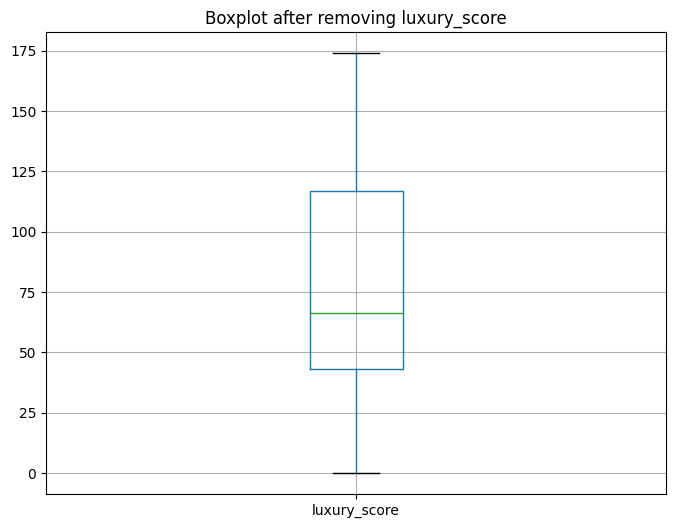

In [118]:
numericalcols = dfdelindh.select_dtypes(include=['float64', 'int64']).columns
# Calculating skewness for each numerical column
skewness = dfdelindh.select_dtypes(include=['float64', 'int64']).apply(lambda x: (x.mean() - x.median()) / x.std())

# Choosing percentiles based on skewness
percentile_lower = 5
percentile_upper = 95

# Adjusting percentiles based on skewness
for col, skew_val in skewness.items():
    if skew_val > 0:  # Right-skewed
        percentile_upper = 95  # Adjust upper percentile
    elif skew_val < 0:  # Left-skewed
        percentile_lower = 5  # Adjust lower percentile

# Winsorizing data based on percentiles
df_winsorized = dfdelindh.copy()
for col in numericalcols:
    lower_bound = np.percentile(df_winsorized[col], percentile_lower)
    upper_bound = np.percentile(df_winsorized[col], percentile_upper)
    df_winsorized[col] = np.where(df_winsorized[col] < lower_bound, lower_bound,
                                   np.where(df_winsorized[col] > upper_bound, upper_bound, df_winsorized[col]))

    plt.figure(figsize=(8, 6))
    df_winsorized.boxplot(column=col)  # Plot boxplot for the current column
    plt.title(f'Boxplot after removing {col}')
    plt.show()




In [119]:
x = df_winsorized.drop(['price'], axis=1)

y = df_winsorized['price']

In [120]:
from sklearn.model_selection import train_test_split


In [121]:

!pip install category_encoders

In [122]:
import category_encoders as ce

In [123]:
from sklearn import preprocessing

label_encoder = ce.OrdinalEncoder(cols=['property_type', 'society', 'sector', 'areaWithType', 'facing',
       'agePossession'])


X_enc = label_encoder.fit_transform(x)



In [124]:
X_enc.shape

(2818, 22)

In [125]:
X_enc.isnull().sum()

property_type          0
society                0
sector                 0
price_per_sqft         0
area                   0
areaWithType           0
bedRoom                0
bathroom               0
balcony                0
floorNum               0
facing                 0
agePossession          0
super_built_up_area    0
built_up_area          0
carpet_area            0
study room             0
servant room           0
store room             0
pooja room             0
others                 0
furnishing_type        0
luxury_score           0
dtype: int64

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X_enc, y, test_size = 0.2, random_state = 0)

In [127]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


rf_regressor = RandomForestRegressor(random_state=0)

rf_regressor.fit(X_train, y_train)

# Predict the Test set results
y_pred = rf_regressor.predict(X_test)
y_pred.shape
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('R-squared:', r2)


Mean Absolute Error: 0.04185797872340426
Mean Squared Error: 0.016245916329787224
R-squared: 0.9835167143401782


In [128]:
from sklearn.inspection import permutation_importance
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [129]:
scores=rf.feature_importances_
scores

array([0.00000000e+00, 2.82478912e-03, 2.35892551e-03, 4.95677223e-01,
       4.79318264e-01, 1.62731123e-03, 1.14847517e-03, 6.13800269e-03,
       7.37039938e-04, 8.26952650e-04, 5.80162255e-04, 5.90383282e-04,
       2.97851246e-03, 1.02220942e-03, 2.35022647e-03, 1.22013220e-04,
       1.49314305e-04, 7.33541047e-05, 1.09142455e-04, 2.47947326e-04,
       1.58248267e-04, 9.61502797e-04])

In [130]:
feature_scores = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

price_per_sqft         0.495677
area                   0.479318
bathroom               0.006138
super_built_up_area    0.002979
society                0.002825
sector                 0.002359
carpet_area            0.002350
areaWithType           0.001627
bedRoom                0.001148
built_up_area          0.001022
luxury_score           0.000962
floorNum               0.000827
balcony                0.000737
agePossession          0.000590
facing                 0.000580
others                 0.000248
furnishing_type        0.000158
servant room           0.000149
study room             0.000122
pooja room             0.000109
store room             0.000073
property_type          0.000000
dtype: float64

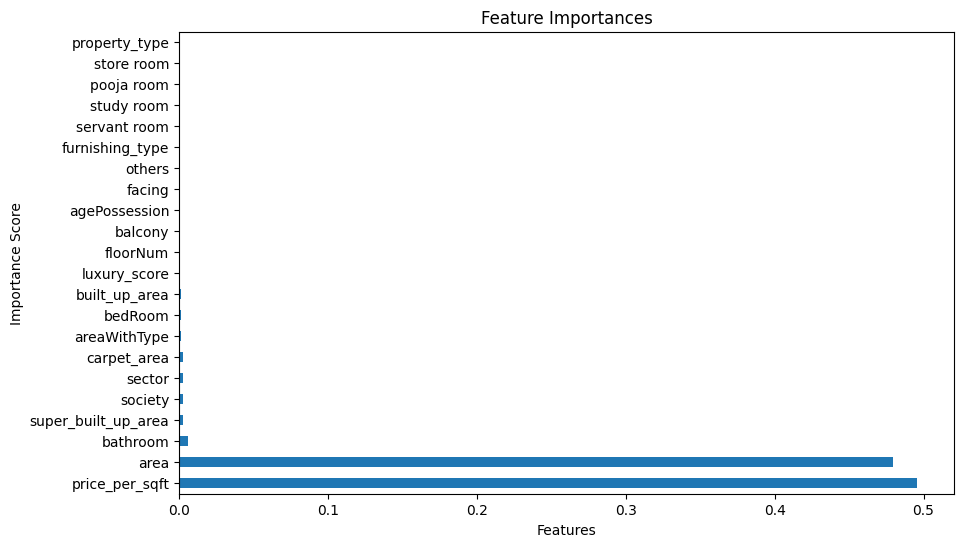

In [131]:
plt.figure(figsize=(10, 6))
feature_scores.plot(kind='barh')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()

In [132]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
for i,col in enumerate(X_train):
    print ("Lasso model coefficients for {} is {}:".format(col,lasso.coef_[i]))

Lasso model coefficients for property_type is 0.0:
Lasso model coefficients for society is 0.00019890648954604367:
Lasso model coefficients for sector is 0.00040800698028058813:
Lasso model coefficients for price_per_sqft is 0.0001799593329037303:
Lasso model coefficients for area is 0.0008960600442003913:
Lasso model coefficients for areaWithType is -8.32890493381975e-06:
Lasso model coefficients for bedRoom is 0.0:
Lasso model coefficients for bathroom is 0.0:
Lasso model coefficients for balcony is 0.0:
Lasso model coefficients for floorNum is 0.0:
Lasso model coefficients for facing is 0.0:
Lasso model coefficients for agePossession is -0.0:
Lasso model coefficients for super_built_up_area is 4.1810593951900136e-05:
Lasso model coefficients for built_up_area is 1.9840924365001765e-05:
Lasso model coefficients for carpet_area is -2.176402727068224e-05:
Lasso model coefficients for study room is -0.0:
Lasso model coefficients for servant room is 0.0:
Lasso model coefficients for stor

In [133]:


feature_coeffs = {
    'property_type': 0.0,
    'society': 0.00021089690513218827,
    'sector': 0.0004390934358832841,

'price_per_sqft' : 0.0001804714551167251,
'area' : 0.0009012980337685999,
 'areaWithType': -8.921755219621318e-06,
 'bedRoom' :0.0,
 'bathroom' : 0.0,
'balcony': 0.0,
'floorNum':0.0,
'facing': 0.0,
'agePossession' : -0.0,
'super_built_up_area': 3.406602022605803e-05,
'built_up_area' : 9.264485702676053e-06,
'carpet_area' : -2.2850941063824082e-05,
'study room' :-0.0,
'servant room' : 0.0,
'store room' : -0.0,
 'pooja room' : 0.0,
 'others' : -0.0,
 'furnishing_type' : 0.0,
 'luxury_score' :8.66164816916489e-05,
}

# Convert the dictionary to a DataFrame
coeff_df = pd.DataFrame(list(feature_coeffs.items()), columns=['Feature', 'Coefficient'])

# Filter features with coefficients close to zero
selected_features = coeff_df[abs(coeff_df['Coefficient']) > 0.0001]['Feature'].tolist()

df_selected = df[selected_features]
print("Selected Features:")
print(selected_features)




Selected Features:
['society', 'sector', 'price_per_sqft', 'area']


In [134]:

X_train2, X_test2, y_train, y_test = train_test_split(X_enc[['society', 'sector', 'price_per_sqft', 'area']], y, test_size = 0.2, random_state = 0)

In [135]:

lasso = Lasso(alpha=0.1)
lasso.fit(X_train2,y_train)
print(lasso.score(X_train2, y_train))
print(lasso.score(X_test2, y_test))

0.9152440024471487
0.9208756935663034
